In [1]:
import tarfile
import ast
import gzip
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import json
import math
%matplotlib inline
import matplotlib.pyplot as plt
import re
import csv

In [2]:
import os
import json
print(os.getcwd())

/Users/macuser/Desktop/TVTropesScraper/TVTropesScraper


In [3]:
with open("Film/Film_tropes_dataset.json", 'r', encoding='utf-8') as json_file:  
    movie_tropes_data = json.loads(json_file.read())
with open("Literature/Literature_tropes_dataset.json", 'r', encoding='utf-8') as json_file:  
    book_tropes_data = json.loads(json_file.read())

In [4]:
books = list(book_tropes_data.keys())
movies = list(movie_tropes_data.keys())

In [5]:
from collections import defaultdict

inverted_index_books = defaultdict(list)
for book, trope_list in book_tropes_data.items():
    for trope in trope_list:
        inverted_index_books[trope].append(book)

inverted_index_movies = defaultdict(list)
for movie, trope_list in movie_tropes_data.items():
    for trope in trope_list:
        inverted_index_movies[trope].append(movie)

# Book tropes exploration

In [18]:
book_trope_freqs = [len(postings) for trope, postings in inverted_index_books.items()]

Total number of tropes for books:

In [19]:
len(book_trope_freqs)

16587

Number of tropes appearing in 1 book:

In [21]:
len(list(filter(lambda x: x==1, book_trope_freqs)))

5079

Number of tropes appearing in <=5 books:

In [22]:
len(list(filter(lambda x: x<=5, book_trope_freqs)))

11461

Number of tropes appearing in <= 10 books:

In [23]:
len(list(filter(lambda x: x<=10, book_trope_freqs)))

13709

Number of tropes appearing in <= 50 books:

In [12]:
len(list(filter(lambda x: x<=50, book_trope_freqs)))

16260

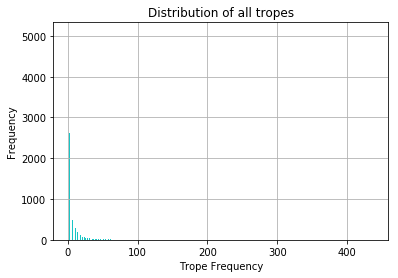

In [15]:
x = sorted(book_trope_freqs)

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for books")
plt.grid(True)
plt.show()

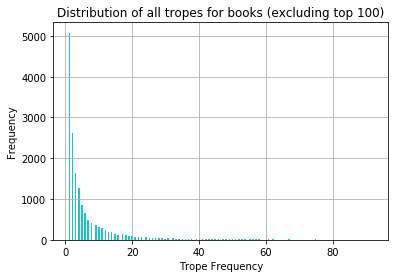

In [24]:
x = sorted(book_trope_freqs)[:-100]

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for books (excluding top 100)")
plt.grid(True)
plt.show()

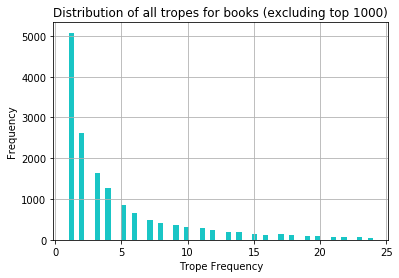

In [25]:
x = sorted(book_trope_freqs)[:-1000]

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for books (excluding top 1000)")
plt.grid(True)
plt.show()

# Movie tropes exploration

In [26]:
movie_trope_freqs = [len(postings) for trope, postings in inverted_index_movies.items()]

Total number of tropes for movies:

In [27]:
len(movie_trope_freqs)

22977

Number of tropes appearing in 1 movie:

In [31]:
len(list(filter(lambda x: x==1, movie_trope_freqs)))

4415

Number of tropes appearing in <=5 movies:

In [30]:
len(list(filter(lambda x: x<=5, movie_trope_freqs)))

12365

Number of tropes appearing in <=10 movies:

In [32]:
len(list(filter(lambda x: x<=10, movie_trope_freqs)))

16446

Number of tropes appearing in <=50 movies:

In [29]:
len(list(filter(lambda x: x<=50, movie_trope_freqs)))

21710

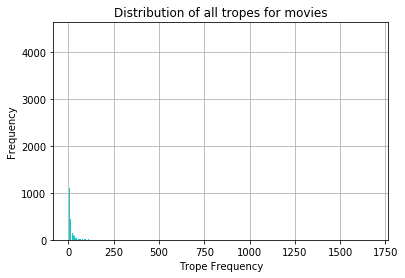

In [35]:
x = sorted(movie_trope_freqs)

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for movies")
plt.grid(True)
plt.show()

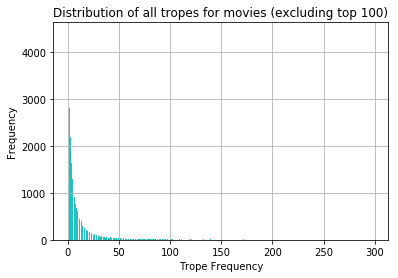

In [39]:
x = sorted(movie_trope_freqs)[:-100]

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for movies (excluding top 100)")
plt.grid(True)
plt.show()

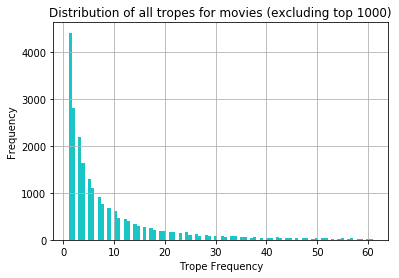

In [38]:
x = sorted(movie_trope_freqs)[:-1000]

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for movies (excluding top 1000)")
plt.grid(True)
plt.show()

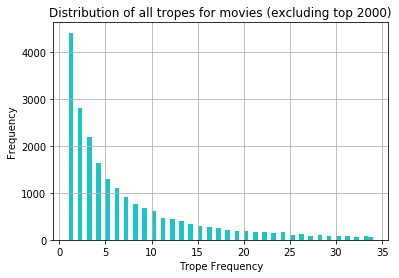

In [43]:
x = sorted(movie_trope_freqs)[:-2000]

n, _, _ = plt.hist(x, "auto", facecolor='c', alpha=0.9)
plt.xlabel('Trope Frequency')
plt.ylabel('Frequency')
plt.title("Distribution of all tropes for movies (excluding top 2000)")
plt.grid(True)
plt.show()